# Reto 04
***Dr. Antonio Arista Jalife***

En este reto vamos a calcular accuracy, sensibilidad y especificidad, para ello, condensaré el ejemplo 4 en una sola celda, y a partir de ahí generaré el reto :) 

In [2]:
import numpy as np
from sklearn.metrics import confusion_matrix


## Supuestos importantes para llegar este punto
* Hubo una ingesta de datos
* Ya hicimos una limpieza de datos  
* Ya decidimos qué pregunta vamos a responder con estos datos
* Ya hicimos un exploratorio
* Ya empezamos en la metodología de un modelo de machine learning
1. Ya separamos datos
2. Ya entrenamos un modelo de clasificación con el conjunto de entrenamiento
3. Ya generamos un pronóstico para los datos del conjunto de prueba

In [3]:

y_esperados = np.array([1,1,1,1,0,0,0,0]) # y_test
y_predichos = np.array([1,0,1,0,1,0,0,0]) # pronóstico  para conjunto de prueba utilizando mi modelo entrenado con conjunto de entrenamiento
resultado = confusion_matrix(y_true = y_esperados, y_pred = y_predichos)
print("Matriz de confusión:\n{}".format(resultado))
(TN, FP, FN, TP) = resultado.ravel()
print("True positives: "+str(TP))
print("True negatives: "+str(TN))
print("False positives: "+str(FP))
print("False negative: "+str(FN))

Matriz de confusión:
[[3 1]
 [2 2]]
True positives: 2
True negatives: 3
False positives: 1
False negative: 2


In [4]:
def calcularAccuracy(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = accuracy * 100
    return accuracy

In [5]:
def calcularSensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad

In [6]:
def calcularEspecificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

In [7]:
acc = calcularAccuracy(TP, TN, FP, FN)
sen = calcularSensibilidad(TP, TN, FP, FN)
spec = calcularEspecificidad(TP, TN, FP, FN)
print("Precision:"+str(acc)+"%")
print("Sensibilidad:"+str(sen)+"%")
print("Especificidad:"+str(spec)+"%")

Precision:62.5%
Sensibilidad:50.0%
Especificidad:75.0%


In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [15]:
y_esperados = np.array([1,1,1,1,0,0,0,0,2,2,2,2]) # y_test
y_predichos = np.array([1,0,1,0,1,0,0,0,0,1,2,0]) # pronóstico  para conjunto de prueba utilizando mi modelo entrenado con conjunto de entrenamiento
resultado = confusion_matrix(y_true = y_esperados, y_pred = y_predichos)
print("Matriz de confusión:\n{}".format(resultado))
# (TN, FP, FN, TP) = resultado.ravel()
# print("True positives: "+str(TP))
# print("True negatives: "+str(TN))
# print("False positives: "+str(FP))
# print("False negative: "+str(FN))
print("Accuracy score: {}".format(accuracy_score(y_true = y_esperados, y_pred = y_predichos)))
print("Precicion score: {}".format(precision_score(y_true = y_esperados, y_pred = y_predichos, average = 'weighted')))

Matriz de confusión:
[[3 1 0]
 [2 2 0]
 [2 1 1]]
Accuracy score: 0.5
Precicion score: 0.6428571428571429


In [22]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [32]:
y_test = [0,0,0,0,1,1,1,1]
y_pred = [0,1,1,1,0,0,0,0]
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score = y_pred)
roc_auc = auc(fpr,tpr)

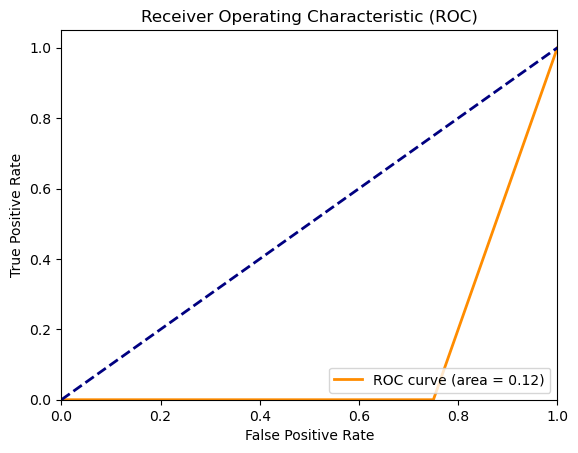

In [33]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()